 Partie 1 – Chargement & Exploration

 1. Chargez le jeu de données Titanic. A chez les 5 premières lignes et les types de données. Que
 remarquez-vous ?

 2. Combien y a-t-il de passagers au total ? Combien de survivants ? Calculez les proportions.
 
 3. Identi ez les colonnes avec des valeurs manquantes. Pour chaque colonne concernée, indiquez le
 nombre et le pourcentage de valeurs manquantes.

Partie 2 – Nettoyage & Préparation

 4 . Imputez les valeurs manquantes : 
Age
 par la médiane, 
Embarked
 par la modalité la plus fréquente.

 5 . Supprimez les colonnes inutiles : 
PassengerId
 , 
Name
 , 
Ticket
 , 
Cabin . Justifez ce choix.

 6 . Créez une nouvelle variable Title à partir de Name . Est-ce une variable informative ? Visualisez sa distribution.

In [38]:
import numpy as np
import pandas as pd

In [39]:
# data = pd.read_csv('StudentsPerformance.csv')
data = pd.read_csv('train.csv')
# data_test = pd.read_csv('StudentsPerformance.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data.count()


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [41]:
data['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [42]:

data['Survived'].value_counts(normalize=True)*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [43]:
print(data.isnull().sum() )
print('Portion valeurs manquante :')
print(data.isnull().sum() / data.shape[0] * 100)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Portion valeurs manquante :
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [44]:
from sklearn.impute import SimpleImputer

# ---- 1. Imputation pour Age (numérique) avec la médiane ----
age_imputer = SimpleImputer(strategy="median")
data["Age"] = age_imputer.fit_transform(data[["Age"]])

# ---- 2. Imputation pour Embarked (catégorielle) avec la valeur la plus fréquente ----
embarked_imputer = SimpleImputer(strategy="most_frequent")
data["Embarked"] = embarked_imputer.fit_transform(data[["Embarked"]])[:, 0]  # <== important


# Vérifier
print(data["Age"].isnull().sum())      # doit être 0
print(data['Embarked'].isnull().sum()) # doit être 0

0
0


Supprimer colonnes car : 
C’est juste un identifiant unique.

Il ne contient aucune information prédictive sur la survie.

Le nom est textuel et unique → pas directement prédictif.

CAbin : Beaucoup de valeurs manquantes (~77%).

In [45]:
cols_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
data_name = data["Name"].copy()  # Conserver une copie de la colonne Name pour l'extraction du titre
data = data.drop(columns=cols_to_drop)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


On peut isoler le titre (Mr, Mrs, Miss, Master, etc.)


In [46]:
# Extraire le titre avec une regex
data["Title"] = data_name.str.extract(r',\s*([^\.]+)\.')

print(data["Title"].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


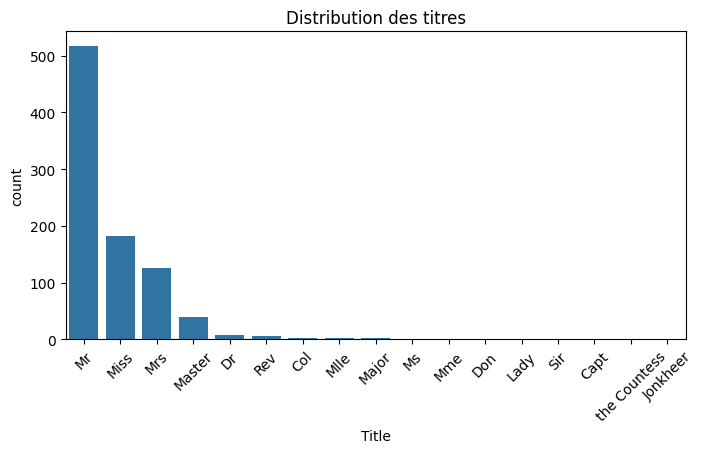

In [47]:
# Visualiser sa distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(data=data, x="Title", order=data["Title"].value_counts().index)
plt.title("Distribution des titres")
plt.xticks(rotation=45)
plt.show()

In [48]:
# . Est-ce une variable informative ?
# Pour savoir si elle est utile, on regarde la relation entre Title et Survived :

print(data.groupby("Title")["Survived"].mean())

Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


On voit que certains titres (Mrs, Miss) ont une probabilité de survie beaucoup plus élevée → variable clairement informative.

Visualisation & Analyse Exploratoire

10. Afficchez la heatmap des corrélations. Quelles sont les variables les plus corrélées avec Survived ?

11. Réalisez des barplots de survie par Sex, Pclass, Embarked, et Title. Qu’en concluez-vous ?

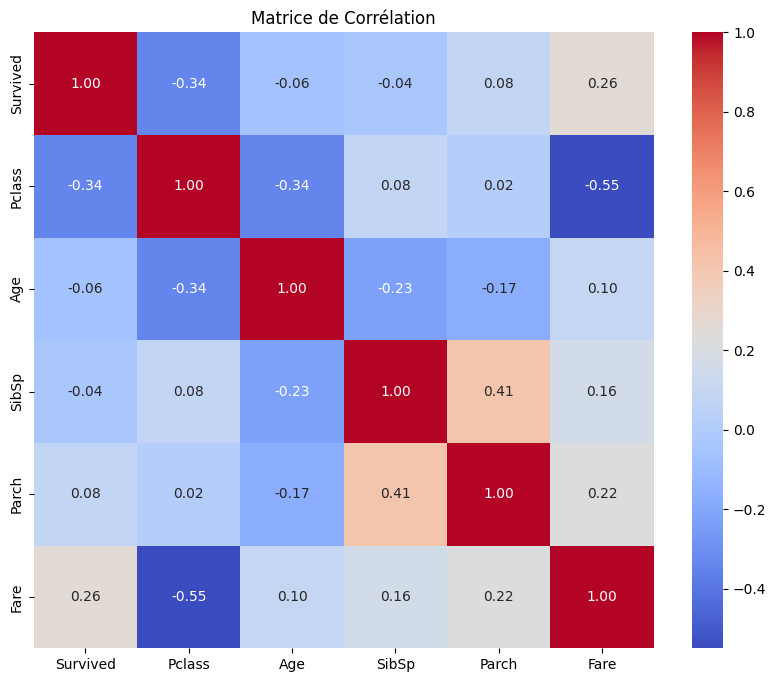

La variable la plus corrélée avec 'Survived' est 'Pclass' avec une corrélation de -0.34
La variable la moins corrélée avec 'Survived' est 'SibSp' avec une corrélation de -0.04


In [49]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr(numeric_only=True)

# Affichage du heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# Trouver la variable la plus corrélée avec 'note moyenne'
# (on suppose que la colonne s'appelle exactement 'note moyenne')
target = 'Survived'
correlations = corr_matrix[target].drop(target)  # on enlève la corrélation de la variable avec elle-même

# Afficher la variable la plus corrélée (en valeur absolue)
most_corr = correlations.abs().idxmax()
value = correlations[most_corr]

print(f"La variable la plus corrélée avec '{target}' est '{most_corr}' avec une corrélation de {value:.2f}")
# Trouver la variable la moins corrélée (en valeur absolue la plus faible)
least_corr = correlations.abs().idxmin()
value = correlations[least_corr]

print(f"La variable la moins corrélée avec '{target}' est '{least_corr}' avec une corrélation de {value:.2f}")

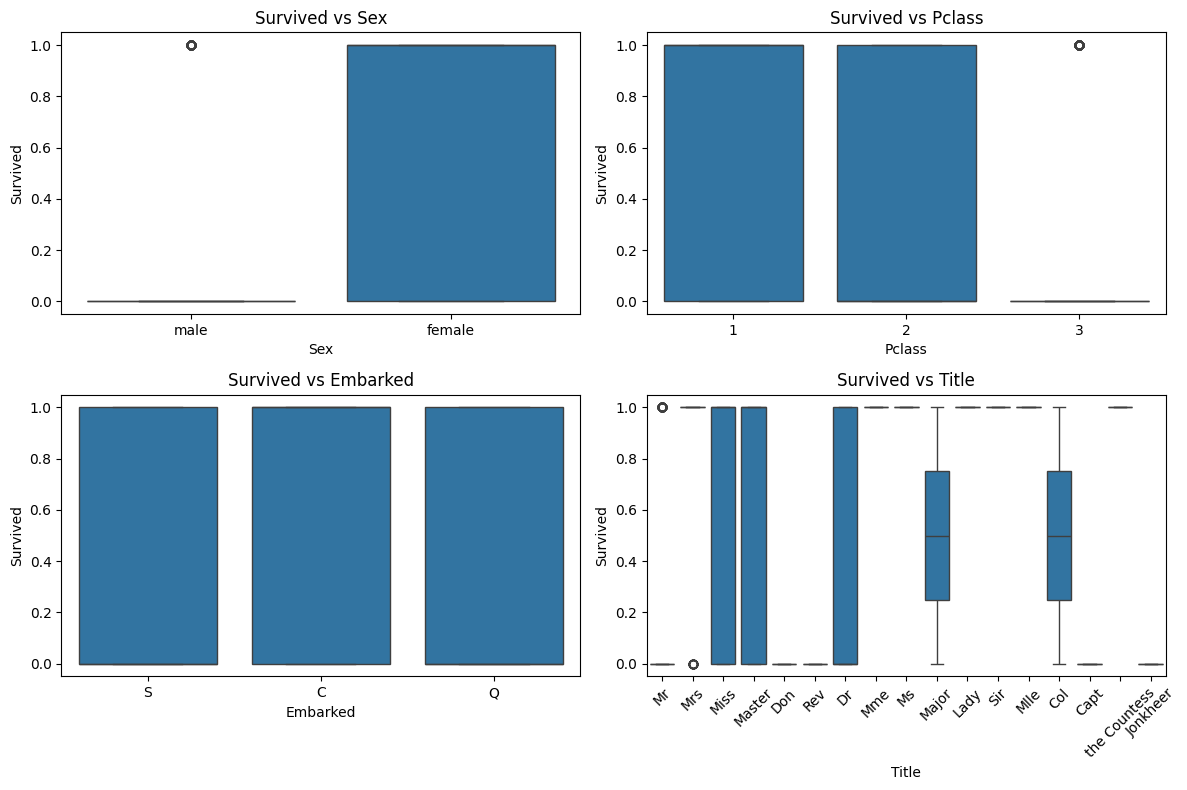

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 lignes, 2 colonnes

sns.boxplot(x='Sex', y='Survived', data=data, ax=axes[0, 0])
axes[0, 0].set_title("Survived vs Sex")

sns.boxplot(x='Pclass', y='Survived', data=data, ax=axes[0, 1])
axes[0, 1].set_title("Survived vs Pclass")

sns.boxplot(x='Embarked', y='Survived', data=data, ax=axes[1, 0])
axes[1, 0].set_title("Survived vs Embarked")

sns.boxplot(x='Title', y='Survived', data=data, ax=axes[1, 1])
axes[1, 1].set_title("Survived vs Title")
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Sexe et classe (Pclass) sont les facteurs majeurs.

Title apporte un raffinement utile pour le modèle.

Embarked a un effet plus faible mais existe.

## Partie 5 – Arbre de Décision
12. Entraînez un DecisionTreeClassifier (max_depth=4). Achez l’arbre avec plot_tree ou
graphviz.
13. Évaluez le modèle avec :
Accuracy
Précision
Rappel
F1-score
Matrice de confusion
Courbe ROC

In [51]:
from sklearn.preprocessing import LabelEncoder

# --- Encoder les variables catégorielles ---
le_sex = LabelEncoder()
data["Sex"] = le_sex.fit_transform(data["Sex"])  # male=1, female=0 satry arbre de decision

le_embarked = LabelEncoder()
data["Embarked"] = le_embarked.fit_transform(data["Embarked"])


le_title = LabelEncoder()
data["Title"] = le_title.fit_transform(data["Title"])

data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,11
1,1,1,0,38.0,1,0,71.2833,0,12
2,1,3,0,26.0,0,0,7.9250,2,8
3,1,1,0,35.0,1,0,53.1000,2,12
4,0,3,1,35.0,0,0,8.0500,2,11


In [52]:
from sklearn.model_selection import train_test_split
# --- Sélection des features ---
features = ["Pclass", "Sex", "Age", "Fare", "Embarked", "SibSp", "Parch", "Title"]
X = data[features]
y = data["Survived"]

# --- Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





 Profondeur = nombre de niveaux de décisions (splits) depuis la racine jusqu’à une feuille.
 
 max_depth=4 limite le nombre de divisions successives à 4 niveaux.

In [53]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf = clf.fit(X_train, y_train)

In [54]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

[[96  9]
 [27 47]]


0.7988826815642458

✅ Affichage de l’arbre avec plot_tree


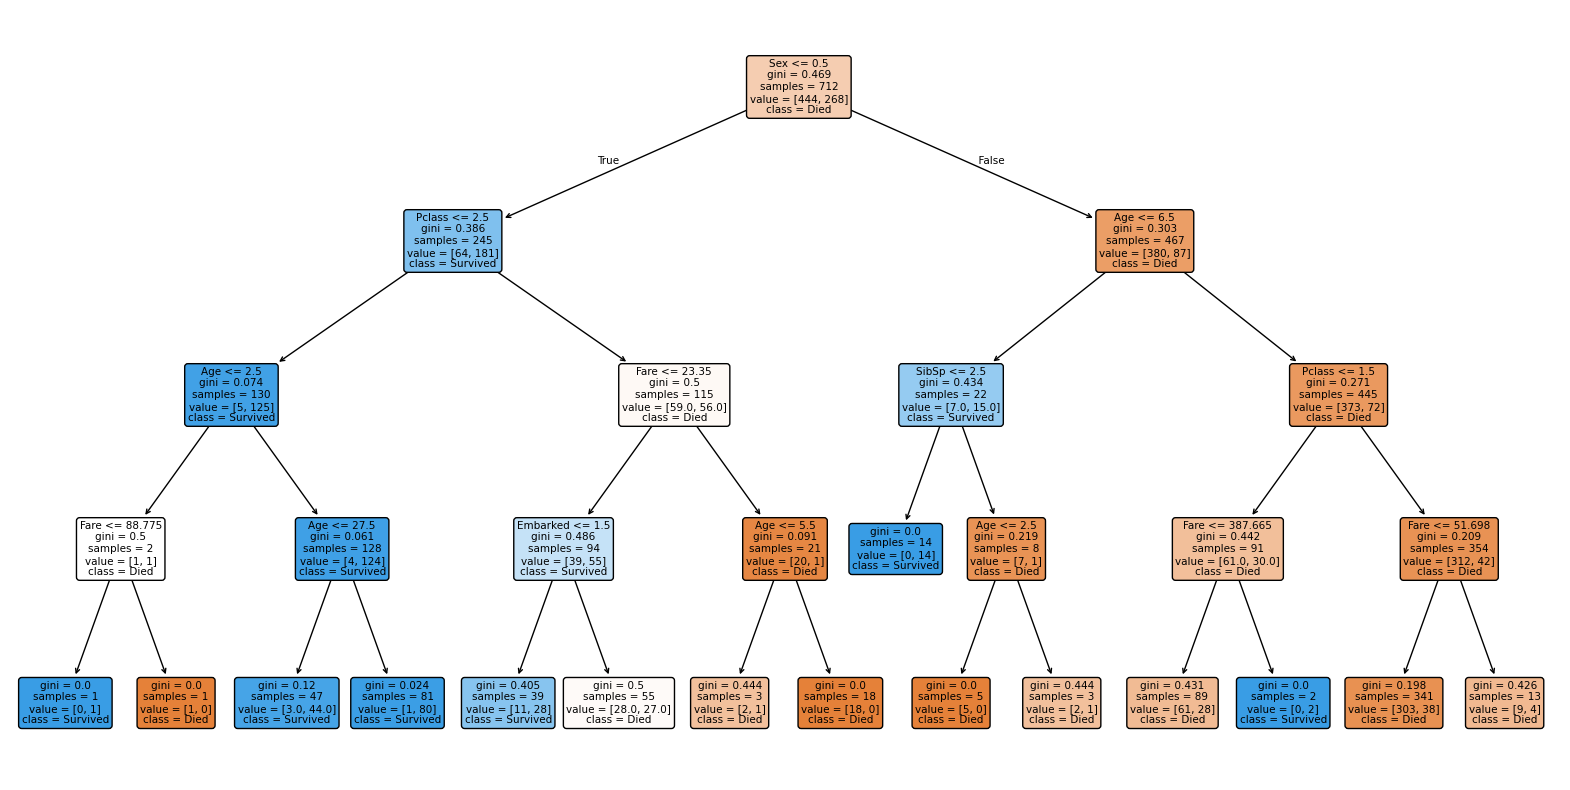

In [55]:
from sklearn.tree import  plot_tree


plt.figure(figsize=(20,10))
plot_tree(
    clf, 
    feature_names=features,
    class_names=["Died", "Survived"],
    filled=True,
    rounded=True
)
plt.show()


Affichage avec Graphviz (arbre plus lisible)

In [74]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=features,
    class_names=["Died", "Survived"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_titanic", format="png", cleanup=True)
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [64]:
# 2. Accuracy, Précision, Rappel, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

acc_arbre = accuracy_score(y_test, y_pred)
prec_arbre = precision_score(y_test, y_pred)
rec_arbre = recall_score(y_test, y_pred)
f1_arbre = f1_score(y_test, y_pred)

print("Accuracy :", acc_arbre)
print("Précision :", prec_arbre)
print("Rappel :", rec_arbre)
print("F1-score :", f1_arbre)

Accuracy : 0.7988826815642458
Précision : 0.8392857142857143
Rappel : 0.6351351351351351
F1-score : 0.7230769230769231


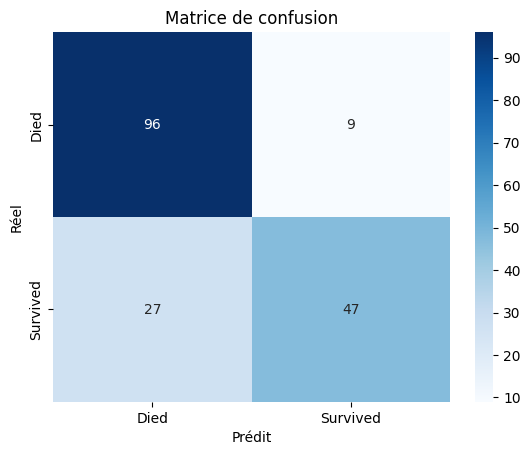

In [58]:
# ✅ 3. Matrice de confusion

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Died", "Survived"],
            yticklabels=["Died", "Survived"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

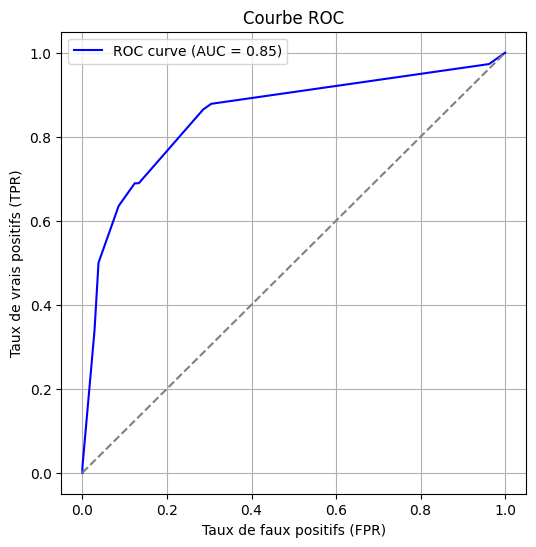

In [59]:
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilités pour la courbe ROC


fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonale
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()


Partie 6 – Random Forest
14. Entraînez une RandomForestClassifier avec 100 arbres. Même split que précédemment.

15. Comparez les performances de la Random Forest avec l’arbre de décision sur toutes les métriques.

16. Affichez feature_importances_. Quelles sont les 3 variables les plus importantes ?



Matrice de confusion Random Forest:
[[89 16]
 [15 59]]


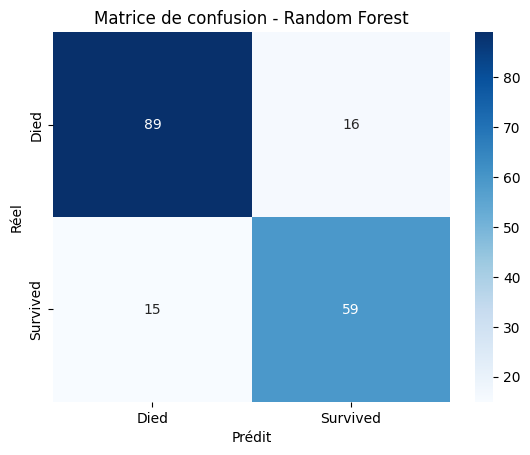

              precision    recall  f1-score   support

        Died       0.78      0.91      0.84       105
    Survived       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



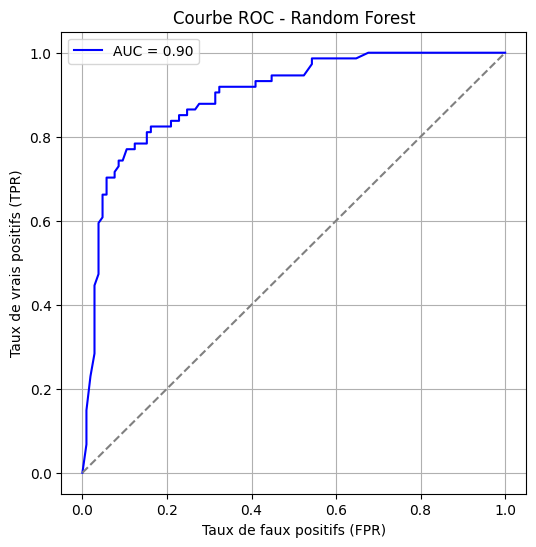

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest avec 100 arbres
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf = rf_clf .fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
print("Matrice de confusion Random Forest:")
print(cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Died", "Survived"],
            yticklabels=["Died", "Survived"])
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["Died", "Survived"]))

y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]  # pour ROC
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.title("Courbe ROC - Random Forest")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.legend()
plt.grid()
plt.show()

In [61]:
acc_random = accuracy_score(y_test, y_pred_rf )
prec_random = precision_score(y_test, y_pred_rf )
rec_random = recall_score(y_test, y_pred_rf )
f1_random = f1_score(y_test, y_pred_rf )

print("Accuracy _random:", acc_random)
print("Précision _random:", prec_random)
print("Rappel _random:", rec_random)
print("F1-score _random:", f1_random)

Accuracy _random: 0.8268156424581006
Précision _random: 0.7866666666666666
Rappel _random: 0.7972972972972973
F1-score _random: 0.7919463087248322


Comparez les performances de la Random Forest avec l’arbre de décision sur toutes les métriques.

In [65]:
# Performances de la Random Forest
print("Performances de la Random Forest:")
print("Accuracy _random:", acc_random)
print("Précision _random:", prec_random)
print("Rappel _random:", rec_random)
print("F1-score _random:", f1_random)

# Afficher les importances de l' arbre de décision
print("Performances de la arbre de décision:")
print("Accuracy :", acc_arbre)
print("Précision :", prec_arbre)
print("Rappel :", rec_arbre)
print("F1-score :", f1_arbre)

Performances de la Random Forest:
Accuracy _random: 0.8268156424581006
Précision _random: 0.7866666666666666
Rappel _random: 0.7972972972972973
F1-score _random: 0.7919463087248322
Performances de la arbre de décision:
Accuracy : 0.7988826815642458
Précision : 0.8392857142857143
Rappel : 0.6351351351351351
F1-score : 0.7230769230769231


In [ ]:
# RAndom Forest -# Récupérer les importances
importances = rf_clf.feature_importances_
# Associer à chaque nom de colonne
feature_names = X_train.columns        
# Trier les importances par ordre décroissant   
indices = np.argsort(importances)[::-1]
# Affichage des importances des features
print("Feature importances:")

for i in range(len(importances)):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
importances = rf_clf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Affichage des 3 variables les plus importantes
print("\nTop 3 variables les plus importantes:")
for i in range(3):
    print(f"{feature_names[indices[i]]}: {importances[indices[i]]:.4f}")
    
importances = rf_clf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Affichage des 3 variables les plus importantes
   

Feature importances:
Fare: 0.2523
Age: 0.2205
Sex: 0.2037
Title: 0.1166
Pclass: 0.0800
SibSp: 0.0568
Parch: 0.0362
Embarked: 0.0339

Top 3 variables les plus importantes:
Fare: 0.2523
Age: 0.2205
Sex: 0.2037


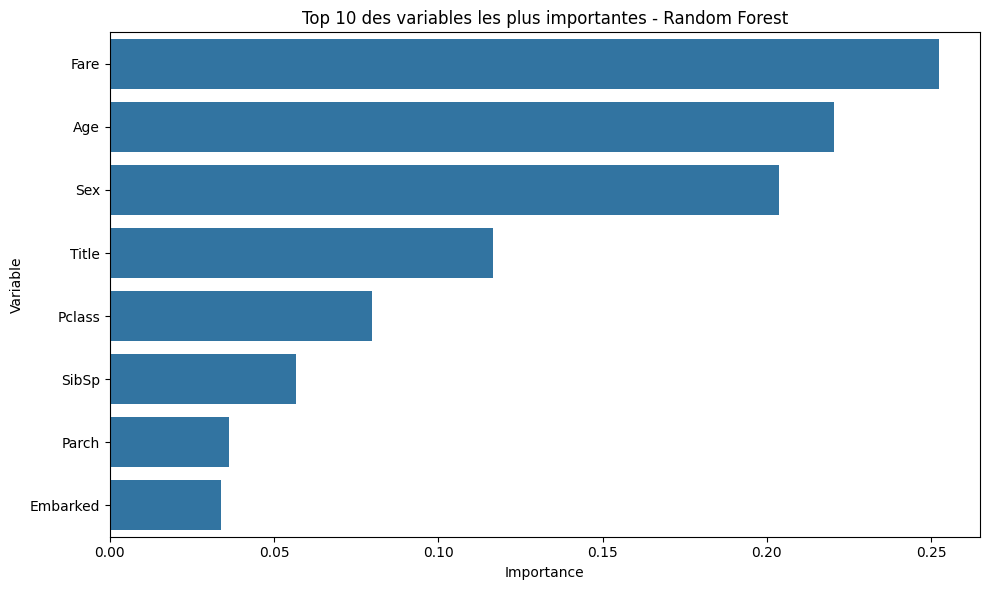

In [68]:
# Récupérer les importances
importances = rf_clf.feature_importances_

# Associer à chaque nom de colonne
feature_names = X_train.columns
feat_importances = pd.Series(importances, index=feature_names)

# Trier et afficher
feat_importances = feat_importances.sort_values(ascending=False)

# Affichage des 3 plus importantes
# print("Les 3 variables les plus importantes sont :")
# print(feat_importances.head(3))

# Affichage graphique
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances[:10], y=feat_importances.index[:10])
plt.title("Top 10 des variables les plus importantes - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

Partie 7 – Analyse & Optimisation

17. Faites varier max_depth entre 1 et 10 pour l’arbre. Tracez l’évolution de l’accuracy en train/test.


Profondeur de l'arbre (max_depth) | Train Accuracy | Test Accuracy
1                              | 0.7879 | 0.7821
2                              | 0.8034 | 0.7654
3                              | 0.8343 | 0.7989
4                              | 0.8399 | 0.7989
5                              | 0.8511 | 0.7989
6                              | 0.8666 | 0.8101
7                              | 0.8848 | 0.8045
8                              | 0.8961 | 0.7933
9                              | 0.9073 | 0.8045
10                             | 0.9171 | 0.7933


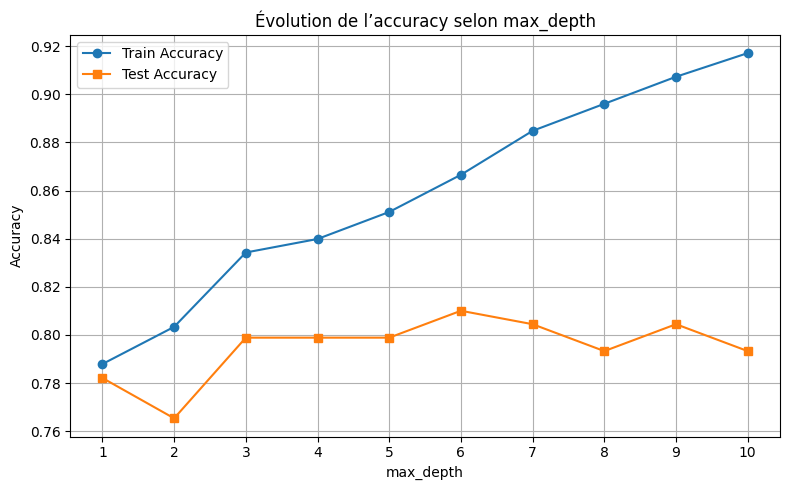

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Listes pour stocker les scores
train_scores = []
test_scores = []

# Tester différentes profondeurs
for depth in range(1, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)

    # Accuracy sur train/test
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))

    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

print("Profondeur de l'arbre (max_depth) | Train Accuracy | Test Accuracy")
for depth, train_acc, test_acc in zip(range(1, 11), train_scores, test_scores):
    print(f"{depth:<30} | {train_acc:.4f} | {test_acc:.4f}")

# Tracer les courbes
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), train_scores, label='Train Accuracy', marker='o')
plt.plot(range(1, 11), test_scores, label='Test Accuracy', marker='s')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Évolution de l’accuracy selon max_depth')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 11))
plt.tight_layout()
plt.show()

✅ max_depth = 6 est le meilleur compromis pour ton jeu de données

1. Overfitting à partir de max_depth=6 :
L’accuracy sur le jeu d'entraînement continue à augmenter fortement, ce qui montre que l’arbre apprend de plus en plus de détails.

Mais l’accuracy sur le test n’augmente plus et baisse légèrement à partir de max_depth=7.

Cela indique un surapprentissage : le modèle apprend trop bien le train, mais généralise moins bien.

2. Profondeur optimale ≈ 6 :
Le meilleur compromis entre biais et variance semble être à max_depth = 6, avec un score test max = 0.8101.

C’est donc la profondeur optimale dans ce cas.

3. Profondeurs faibles = sous-apprentissage :
max_depth=1 ou 2 donnent des scores faibles → le modèle est trop simple pour bien capturer la structure des données.



18. Utilisez cross_val_score pour comparer la stabilité des deux modèles.

In [72]:
from sklearn.model_selection import cross_val_score

# 1. Modèle arbre de décision (profondeur 4)
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_scores = cross_val_score(dt_model, X, y, cv=5)

# 2. Modèle Random Forest (100 arbres)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=5)

# Affichage des scores
print("Decision Tree (max_depth=4):")
print("Scores:", dt_scores)
print("Moyenne:", np.mean(dt_scores))
print("Écart-type:", np.std(dt_scores))

print("\nRandom Forest (100 arbres):")
print("Scores:", rf_scores)
print("Moyenne:", np.mean(rf_scores))
print("Écart-type:", np.std(rf_scores))

Decision Tree (max_depth=4):
Scores: [0.75977654 0.82022472 0.81460674 0.78651685 0.84269663]
Moyenne: 0.8047642960266147
Écart-type: 0.028745879649143206

Random Forest (100 arbres):
Scores: [0.80446927 0.79775281 0.85955056 0.75842697 0.80898876]
Moyenne: 0.8058376749733224
Écart-type: 0.03228007574625304



19. Effectuez un GridSearchCV sur la Random Forest (max_depth, min_samples_split,
n_estimators). Quel est le meilleur modèle ?

   Un GridSearchCV permet de trouver automatiquement la meilleure combinaison d’hyperparamètres pour ta Random Forest, en évaluant chaque configuration via validation croisée.

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Définir les grilles de recherche
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

# 2. Initialiser le modèle de base
rf = RandomForestClassifier(random_state=42)

# 3. Lancer GridSearch avec validation croisée (cv=5)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# 4. Entraînement sur les données
grid_search.fit(X, y)

# 5. Résultats
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("Meilleure accuracy :", grid_search.best_score_)


Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Meilleure accuracy : 0.8350386039796623


Partie 8 – Conclusion

20. Conclusion :

Quel modèle est le plus performant ?

Quelle variable est la plus discriminante ?

Quels avantages/inconvénients pour chaque méthode ?

Quelles pistes d’amélioration ?

➡️ La Random Forest est la plus performante : elle généralise mieux grâce à l’agrégation de plusieurs arbres, limitant l’overfitting.

Top 3 variables les plus importantes:

Fare: 0.2523

Age: 0.2205

Sex: 0.2037

| Random Forest | - Performant

- Réduit l’overfitting

- Gère bien les données manquantes et bruitées | - Moins interprétable (black box)

- Plus lent à entraîner et à tester 

